<a href="https://colab.research.google.com/github/huy19146341/AI/blob/main/KiemTraTuan14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


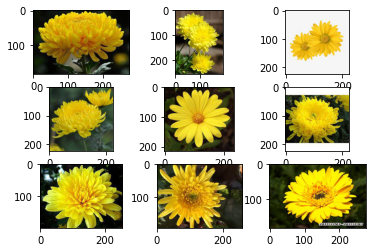

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/DaTa_AI/Hoa/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'Cuc'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [29]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/DaTa_AI/Hoa/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('Cuc'):
    output = 0
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Duoc'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('MatTroi'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('VanTho'):
    output = 3
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)



photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('Hoa.npy', photos)
save('Hoa_labels.npy', labels)

(59, 150, 150, 3) (59,)


In [31]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(11, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(photos, labels, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 374ms/step - loss: 1898.5580 - accuracy: 0.1017
Epoch 2/100
2/2 [==============================] - 0s 24ms/step - loss: 5442.7183 - accuracy: 0.2373
Epoch 3/100
2/2 [==============================] - 0s 24ms/step - loss: 1086.8571 - accuracy: 0.3898
Epoch 4/100
2/2 [==============================] - 0s 25ms/step - loss: 367.9198 - accuracy: 0.3898
Epoch 5/100
2/2 [==============================] - 0s 26ms/step - loss: 144.4438 - accuracy: 0.5085
Epoch 6/100
2/2 [==============================] - 0s 26ms/step - loss: 19.9370 - accuracy: 0.7627
Epoch 7/100
2/2 [==============================] - 0s 25ms/step - loss: 31.6535 - accuracy: 0.5763
Epoch 8/100
2/2 [==============================] - 0s 25ms/step - loss: 1.0704 - accuracy: 0.9831
Epoch 9/100
2/2 [==============================] - 0s 25ms/step - loss: 1.5451 - accuracy: 0.9661
Epoch 10/100
2/2 [==============================] - 0s 23ms/step - loss: 1.9617 - accuracy: 0.9322
Epo

In [33]:
model.evaluate(photos,labels)

2/2 [==============================] - 0s 17ms/step - loss: 2.0205e-09 - accuracy: 1.0000


[2.020496214782952e-09, 1.0]

In [10]:
model.save('4loaihoa.h5')

In [34]:
classes = ["hoacuc","hocthuocduoc","hoamattroi","hoavantho"]

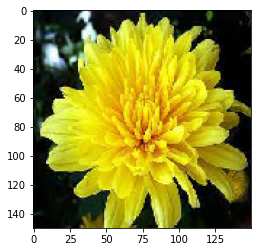

In [39]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('/content/drive/MyDrive/DaTa_AI/Hoa/Cuc7.jpg', target_size=(150,150))
plt.imshow(img)

In [40]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.7266023  0.02013276 0.09736867 0.0129084  0.01494493 0.01136245
  0.00511076 0.00826248 0.0778181  0.01155785 0.01393125]]


'hoacuc'

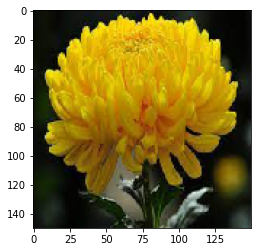

In [43]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

#mg = load_img('/content/drive/MyDrive/DaTa_AI/Hoa/Duoc7.jpg', target_size=(150,150))
img = load_img('hoacuc001.jpg', target_size=(150,150))
plt.imshow(img)

In [44]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.56250703 0.04427454 0.10694364 0.03410688 0.03002659 0.02507542
  0.01365914 0.02081055 0.11000933 0.02054621 0.0320406 ]]


'hoacuc'

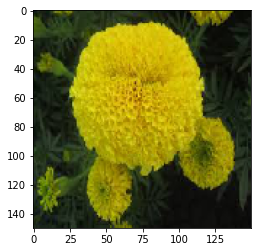

In [45]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

#mg = load_img('/content/drive/MyDrive/DaTa_AI/Hoa/Duoc7.jpg', target_size=(150,150))
img = load_img('hoavantho001.jpg', target_size=(150,150))
plt.imshow(img)

In [46]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.07512635 0.11314798 0.1356847  0.20053318 0.05516962 0.06133956
  0.05698549 0.08794164 0.08856514 0.04150682 0.08399952]]


'hoavantho'